In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234567)

In [63]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [64]:
X1=np.random.multivariate_normal([1,1],[[0.01,0],
        [0,0.01]],100)
X2=np.random.multivariate_normal([2,2],[[0.1,0],
        [0,0.1]],100)
X3=np.random.multivariate_normal([3,3],[[0.01,0],
        [0,0.01]],100)

x=np.column_stack((np.ones((300,1)),np.concatenate((X1,X2,X3), axis=0)))
y=np.zeros((300,3))
y[0:99,0]=1
y[100:199,1]=1
y[200:299,2]=1
Beta=np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(x),x)),np.transpose(x)),y)
yhat = np.dot(x,Beta)
y_pred= np.argmax(yhat, axis=1)


In [65]:
b12=np.subtract([Beta[:,[0]]],Beta[:,[1]])
b23=np.subtract([Beta[:,[1]]],Beta[:,[2]])
b13=np.subtract([Beta[:,[0]]],Beta[:,[2]])

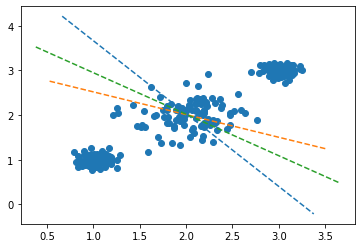

In [66]:
x=np.concatenate((X1,X2,X3))
plt.scatter(x[:,[0]], x[:,[1]])
abline(-b12[0,1]/b12[0,2],-b12[0,0]/b12[0,2])
abline(-b23[0,1]/b23[0,2],-b23[0,0]/b23[0,2])
abline(-b13[0,1]/b13[0,2],-b13[0,0]/b13[0,2])
plt.show()

In [67]:
x=np.concatenate((X1,X2,X3))
n = len(x)
mu1=np.mean(X1,axis=0)
mu2=np.mean(X2,axis=0)
mu3=np.mean(X3,axis=0)
pi1=len(X1)/(len(X1)+len(X2)+len(X3))
pi2=len(X2)/(len(X1)+len(X2)+len(X3))
pi3=len(X3)/(len(X1)+len(X2)+len(X3))
mu1 = np.repeat(mu1,100).reshape(2,100)
mu2 = np.repeat(mu2,100).reshape(2,100)
mu3 = np.repeat(mu3,100).reshape(2,100)
sigma= 1/(n-3)*(np.dot((np.subtract(np.transpose(X1),mu1)),(np.subtract(X1,np.transpose(mu1))))+np.dot((np.subtract(np.transpose(X2),mu2)),(np.subtract(X2,np.transpose(mu2))))
+np.dot((np.subtract(np.transpose(X3),mu3)),(np.subtract(X3,np.transpose(mu3)))))

In [68]:
#decision boundary:
mu1=np.mean(X1,axis=0)
mu2=np.mean(X2,axis=0)
mu3=np.mean(X3,axis=0)
b12=np.dot(np.linalg.pinv(sigma),(np.subtract(mu2,mu1)))
a12=-1/2*np.dot((np.dot((np.add(mu1,mu2)),np.linalg.pinv(sigma))),(np.subtract(mu2,mu1)))


b13=np.dot(np.linalg.pinv(sigma),(np.subtract(mu3,mu1)))
a13=-1/2*np.dot((np.dot((np.add(mu1,mu3)),np.linalg.pinv(sigma))),(np.subtract(mu3,mu1)))

b23=np.dot(np.linalg.pinv(sigma),(np.subtract(mu3,mu2)))
a23=-1/2*np.dot((np.dot((np.add(mu2,mu3)),np.linalg.pinv(sigma))),(np.subtract(mu3,mu2)))

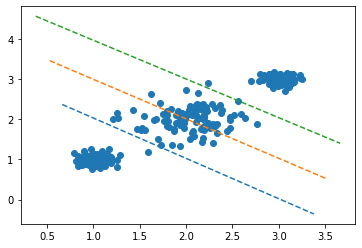

In [69]:
plt.scatter(x[:,[0]], x[:,[1]])
abline(-b12[0]/b12[1],-a12/b12[1])
abline(-b13[0]/b13[1],-a13/b13[1])
abline(-b23[0]/b23[1],-a23/b23[1])
plt.show()